In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
#read in csvs of sensor data
dibner = pd.read_csv('sonycnode-b827eb42bd4a.sonyc.csv',skiprows=3,names=['timestamp','dBAS'])
rogers = pd.read_csv('sonycnode-b827ebafe148.sonyc.csv',skiprows=3,names=['timestamp','dBAS'])

In [5]:
#convert unix epoch time to date times
dibner.timestamp = dibner.timestamp.astype(int)
dibner.timestamp  = pd.to_datetime(dibner.timestamp,unit='s')

rogers.timestamp = rogers.timestamp.astype(int)
rogers.timestamp = pd.to_datetime(rogers.timestamp,unit='s')

In [6]:
#date range
print(min(dibner.timestamp),max(dibner.timestamp))
print(min(rogers.timestamp),max(rogers.timestamp))

2019-04-01 04:00:30 2019-05-10 13:55:23
2019-02-21 10:17:14 2019-05-10 13:58:27


Text(0.5, 1.0, 'Time Series of dBAS at Dibner Library')

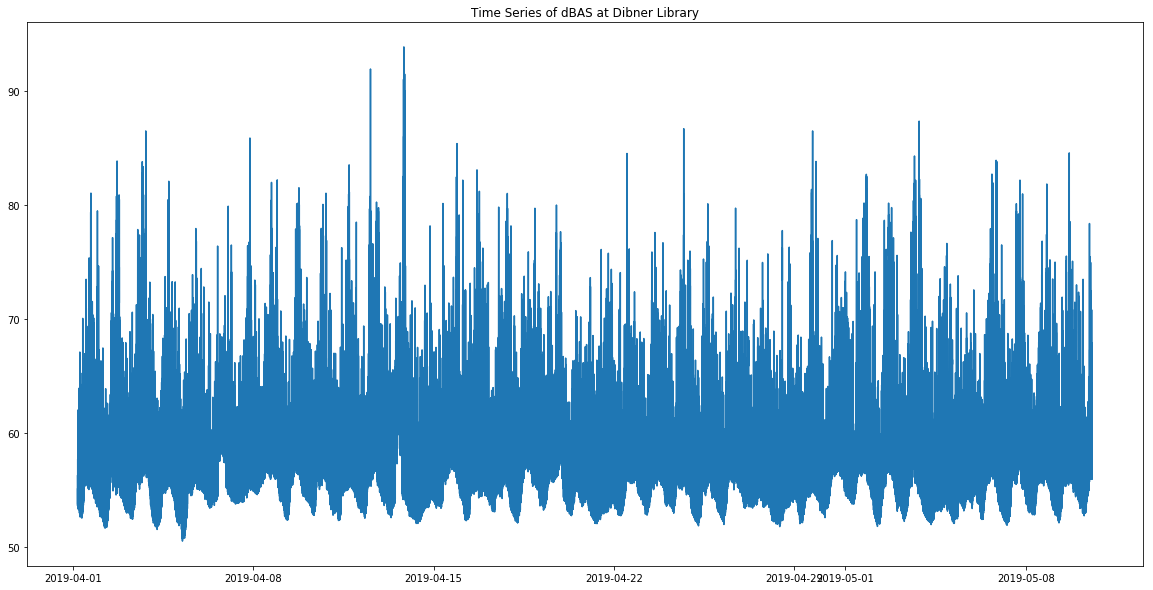

In [7]:
#dibner analysis
dibner_ts = dibner.set_index('timestamp')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(dibner_ts['dBAS'])
ax.set_title("Time Series of dBAS at Dibner Library")

Text(0.5, 1.0, 'Average Decibles by Hour of the Day')

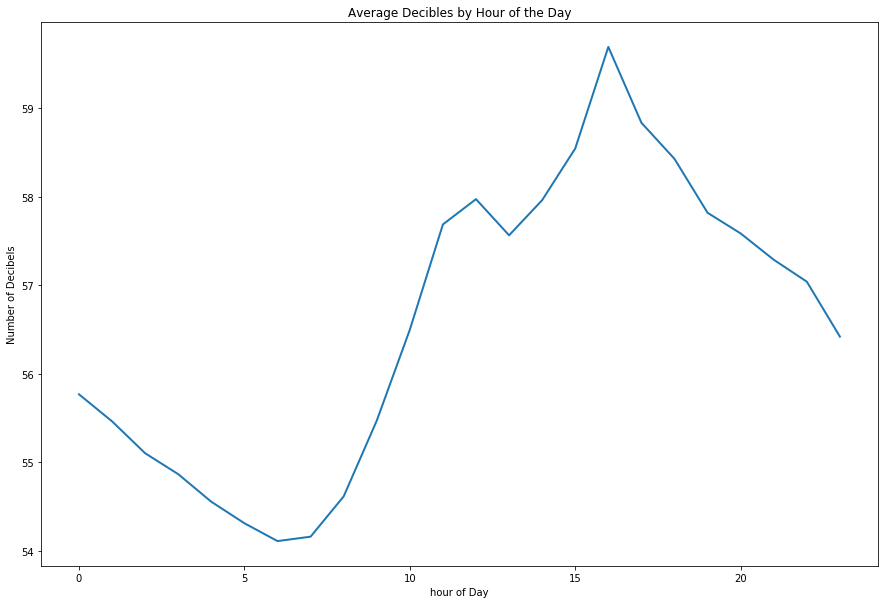

In [8]:
#graph the average hourly decibels
dibner['hour'] = dibner['timestamp'].dt.hour
dbas_hr = pd.DataFrame(dibner.groupby('hour')['dBAS'].mean())

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)


ax.plot(dbas_hr['dBAS'],linewidth=2)
ax.set_xlabel("hour of Day")
ax.set_ylabel("Number of Decibels")
ax.set_title("Average Decibles by Hour of the Day")

In [16]:
#load counts data
morning_counts = pd.read_csv('morning_counts.csv')
noon_counts = pd.read_csv('noon_counts.csv')

In [17]:
from datetime import datetime  
from datetime import timedelta  

#initialize start times for each count series
morning_date = datetime.strptime('2019-05-06 07:00:00', '%Y-%m-%d %X')
noon_date = datetime.strptime('2019-05-06 12:00:00', '%Y-%m-%d %X')

#generate list of times and convert to data frame
morning_times = pd.DataFrame(list(pd.date_range(morning_date,periods=morning_counts.shape[0],freq='2S')))
noon_times = pd.DataFrame(list(pd.date_range(noon_date,periods=noon_counts.shape[0],freq='2S')))

#join to counts tables

morning_counts = pd.merge(left=morning_counts,right=morning_times,left_index=True,right_index=True)
noon_counts = pd.merge(left=noon_counts,right=noon_times,left_index=True,right_index=True)

In [18]:
#filter sound 
dibner_morning = dibner[(dibner['timestamp']>='2019-05-06 07:00:00')&(dibner['timestamp']<='2019-05-06 09:01:00')]
dibner_noon = dibner[(dibner['timestamp']>='2019-05-06 11:59:00')&(dibner['timestamp']<='2019-05-06 14:01:00')]

In [19]:
morning_counts = pd.merge(left=morning_counts,right=dibner_morning,left_on=0,right_on='timestamp')
noon_counts = pd.merge(left=noon_counts,right=dibner_noon,left_on=0,right_on='timestamp')

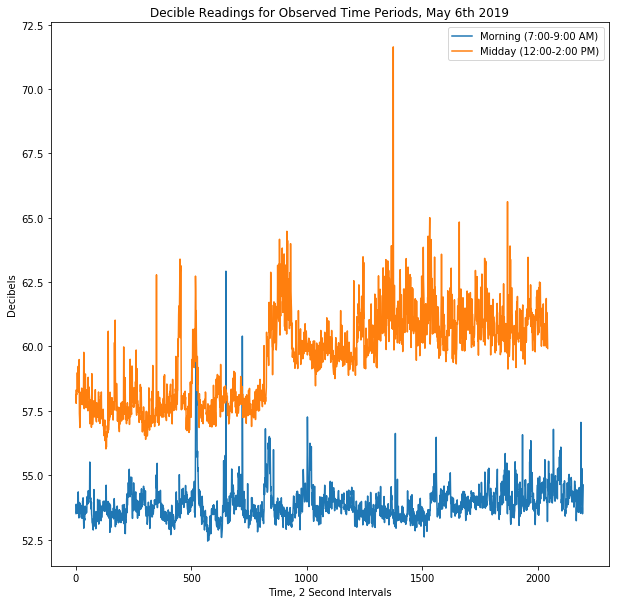

In [35]:
#decibels Over Time
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111
                    )
ax.plot(morning_counts['dBAS'],label='Morning (7:00-9:00 AM)')
ax.plot(noon_counts['dBAS'],label='Midday (12:00-2:00 PM)')
ax.set_xlabel("Time, 2 Second Intervals")
ax.set_ylabel("Decibels")
ax.set_title("Decible Readings for Observed Time Periods, May 6th 2019")
plt.legend()

In [43]:
#add cumulative sums
morning_counts['cumsum'] = morning_counts['vehicles'].cumsum()
noon_counts['cumsum'] = noon_counts['vehicles'].cumsum()

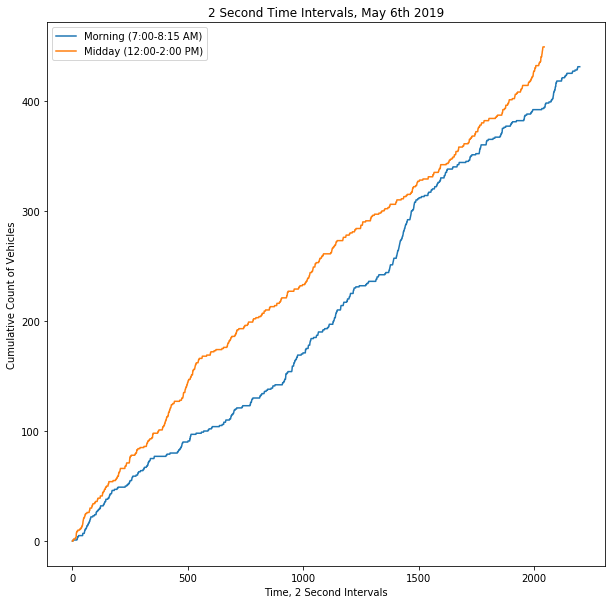

In [48]:
#decibels Over Time
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(morning_counts['cumsum'],label='Morning (7:00-8:15 AM)')
ax.plot(noon_counts['cumsum'],label='Midday (12:00-2:00 PM)')
ax.set_xlabel("Time, 2 Second Intervals")
ax.set_ylabel("Cumulative Count of Vehicles")
ax.set_title("2 Second Time Intervals, May 6th 2019")
plt.legend()

In [51]:
morning_counts.columns

Index(['time', 'vehicles', 0, 'timestamp', 'dBAS', 'hour', 'cumsum'], dtype='object')

In [52]:
morning_counts.set_index('timestamp',inplace=True)

In [57]:
noon_counts.set_index('timestamp',inplace=True)

In [80]:
agg_morning = morning_counts.groupby(pd.TimeGrouper(freq='5Min')).agg('sum') #or other function
agg_noon = noon_counts.groupby(pd.TimeGrouper(freq='5Min')).agg('sum') #or other function

agg_morning_mean = morning_counts.groupby(pd.TimeGrouper(freq='5Min')).agg('mean') #or other function
agg_noon_mean = noon_counts.groupby(pd.TimeGrouper(freq='5Min')).agg('mean') 

/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
/nfshome/cb4102/.conda/envs/deeplearn/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


In [81]:
agg_noon.columns

Index(['time', 'vehicles', 'dBAS', 'hour', 'cumsum'], dtype='object')

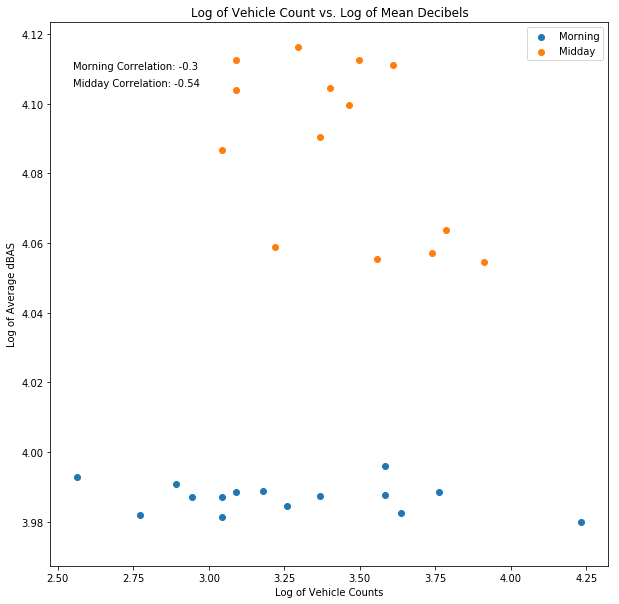

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(np.log(agg_morning['vehicles']),np.log(agg_morning_mean['dBAS']),label='Morning')
ax.scatter(np.log(agg_noon['vehicles']),np.log(agg_noon_mean['dBAS']),label='Midday')

ax.text(x=2.55,y=4.11,s="Morning Correlation: {}".format(round(agg_morning['vehicles'] \
                                                               .corr(agg_morning_mean['dBAS']),2)))
ax.text(x=2.55,y=4.105,s="Midday Correlation: {}".format(round(agg_noon['vehicles'] \
                                                               .corr(agg_noon_mean['dBAS']),2)))

ax.set_title("Log of Vehicle Count vs. Log of Mean Decibels")
ax.set_xlabel("Log of Vehicle Counts")
ax.set_ylabel("Log of Average dBAS")
plt.legend()

In [72]:
round(agg_morning['vehicles'].corr(agg_morning_mean['dBAS']),2)

-0.6